# Comparison of Movies Across Streaming Platforms

Imports:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Dataframe:

In [2]:
streaming_movies_df = pd.read_csv('./MoviesOnStreamingPlatforms.csv')

# Initial Analysis:

In [3]:
streaming_movies_df.head()

,Unnamed: 0,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,The Irishman,2019,18+,98/100,1,0,0,0,0
1,1,2,Dangal,2016,7+,97/100,1,0,0,0,0
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,0
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,0
4,4,5,Roma,2018,18+,94/100,1,0,0,0,0


Ordered by Rotten Tomatoes rating, 1 if movie is present on streaming platform

In [4]:
# Dropping 'Type' and 'Unnamed: 0 columns'
streaming_movies_df = streaming_movies_df.drop('Unnamed: 0', axis=1)
streaming_movies_df = streaming_movies_df.drop('Type', axis=1)

Rotten Tomatoes Clean Up

In [5]:
# Remove '/100'
streaming_movies_df['Rotten Tomatoes'] = streaming_movies_df['Rotten Tomatoes'].str[:-4]

In [6]:
# Fill Nulls with 0
streaming_movies_df['Rotten Tomatoes'] = streaming_movies_df['Rotten Tomatoes'].fillna(0)

In [7]:
# Cast as Int
streaming_movies_df['Rotten Tomatoes'] = streaming_movies_df['Rotten Tomatoes'].astype(int)

In [8]:
streaming_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9515 entries, 0 to 9514
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               9515 non-null   int64 
 1   Title            9515 non-null   object
 2   Year             9515 non-null   int64 
 3   Age              5338 non-null   object
 4   Rotten Tomatoes  9515 non-null   int32 
 5   Netflix          9515 non-null   int64 
 6   Hulu             9515 non-null   int64 
 7   Prime Video      9515 non-null   int64 
 8   Disney+          9515 non-null   int64 
dtypes: int32(1), int64(6), object(2)
memory usage: 632.0+ KB


In [9]:
streaming_movies_df.shape

(9515, 9)

In [10]:
netflix_df = streaming_movies_df[streaming_movies_df['Netflix'] == 1]

In [11]:
netflix_df.shape

(3695, 9)

In [12]:
hulu_df = streaming_movies_df[streaming_movies_df['Hulu'] == 1]

In [13]:
hulu_df.shape

(1047, 9)

In [14]:
prime_video_df = streaming_movies_df[streaming_movies_df['Prime Video'] == 1]

In [15]:
prime_video_df.shape

(4113, 9)

In [16]:
disney_df = streaming_movies_df[streaming_movies_df['Disney+'] == 1]

In [17]:
disney_df.shape

(922, 9)

# First Impressions
- Amazon Prime Video has the most movies, but many are shared w/ other platforms. This can be attributed to the fact that Amazon Prime Video offers a rental service and the licensing for PPV are separate from typical SVOD.

#  Number of Movies per Platform

C:\Users\Ben\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


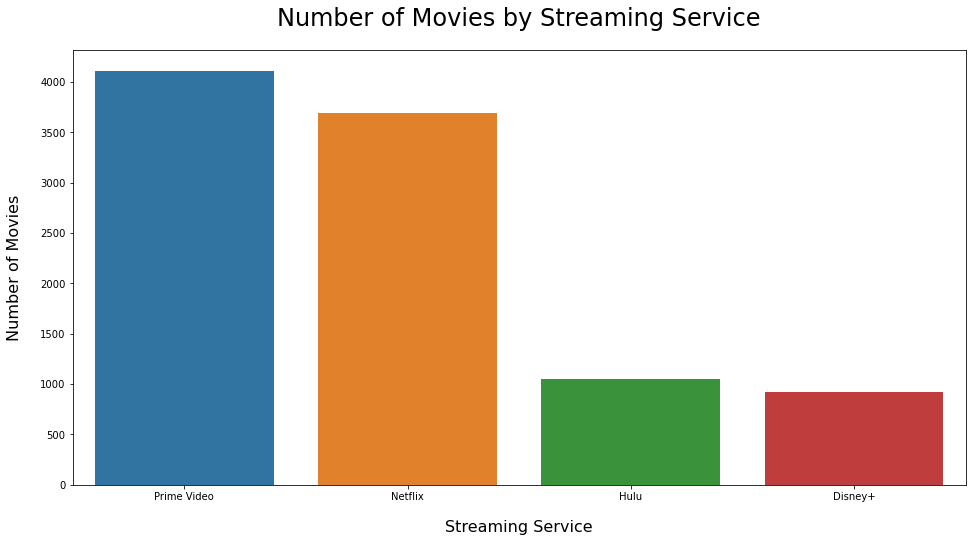

In [18]:
# Initialize figure
fig, ax = plt.subplots(figsize=(16, 8))

# Define X and Y Values; hard coding based on shapes above
x_vals = ['Prime Video','Netflix', 'Hulu', 'Disney+']
y_vals = [4113, 3695, 1047, 922]

#Seaborn Bar Plot
sns.barplot(x_vals, y_vals)

# Chart title, Axes Labels
ax.set_title('Number of Movies by Streaming Service', fontsize = 24, pad=24)
plt.xlabel('Streaming Service', fontsize = 16, labelpad=18)
plt.ylabel('Number of Movies', fontsize = 16, labelpad=18)

# Save chart as local image
plt.savefig('./charts/number_of_movies.png')

# Average Rotten Tomato Score by Platform

In [19]:
mean_list = []

mean_list.append(prime_video_df['Rotten Tomatoes'].mean())
mean_list.append(netflix_df['Rotten Tomatoes'].mean())
mean_list.append(hulu_df['Rotten Tomatoes'].mean())
mean_list.append(disney_df['Rotten Tomatoes'].mean())

In [20]:
mean_list

[50.398735716022365, 54.344790257104194, 60.39732569245463, 58.31236442516269]

C:\Users\Ben\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


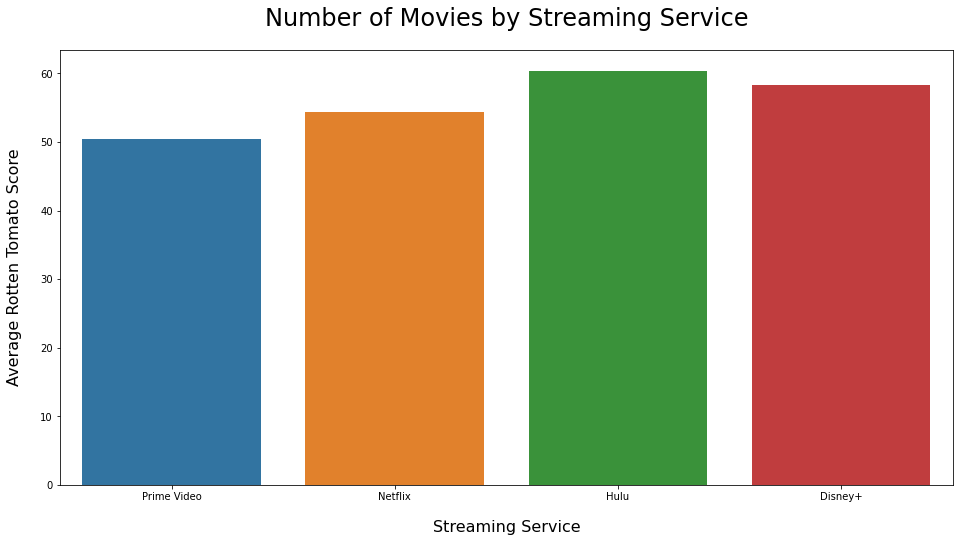

In [21]:
# Initialize figure
fig, ax = plt.subplots(figsize=(16, 8))

# Define X and Y Values; hard coding based on shapes above
x_vals = ['Prime Video','Netflix', 'Hulu', 'Disney+']
y_vals = mean_list

#Seaborn Bar Plot
sns.barplot(x_vals, y_vals)

# Chart title, Axes Labels
ax.set_title('Number of Movies by Streaming Service', fontsize = 24, pad=24)
plt.xlabel('Streaming Service', fontsize = 16, labelpad=18)
plt.ylabel('Average Rotten Tomato Score', fontsize = 16, labelpad=18)

# Save chart as local image
plt.savefig('./charts/average_ratings.png')

# Next Steps:
- See if any relationship between average RT rating and Company Performance (Subscriber Numbers, Watched Hours)
- Compare Box Office performance across platform
- Goal: Determine which factor is most likely to be most important to a streaming company when deciding which movie rights to license from studios
